In [13]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Network at address 0x104598620 with 4 nodes and 3 edges

[120.0, 120.0, 120.0]
6.59107497148
0.0
0.00216899212277


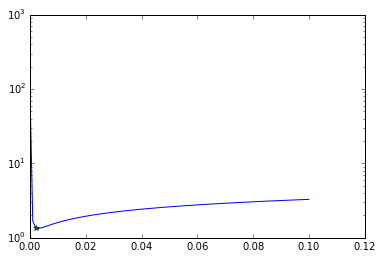

In [14]:
fi = "indata/3pipes3.inp"     #location of .inp file
fc = "indata/3pipes3.config"  #location of .config file
#fi = "indata/triple0.inp"     #location of .inp file
#fc = "indata/triple0.config"  #location of .config file
mtype = 1                          #model used along network edges. 1 for Preissman Slot. 0 for uniform
n1 = PyNetwork(fi, fc, mtype)      #a network object
print n1 
print n1.a
p1 = PyPipe_ps(n1.Ns[0],1.,n1.Ls[0],n1.M,n1.a[0])
print p1.PhiofA(0.681455, False)

print p1.PhiofA(0., False)
Qext = 0.001
xs = pow((.1/9.8*Qext**2),(1./3.))
print xs
s = np.linspace(1e-5,1e-1,100)
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(s,[Qext/s[i]+p1.PhiofA(s[i],False) for i in range(len(s))])
ax.plot(xs,Qext/xs+p1.PhiofA(xs,False),'*')
ax.set_yscale('log')

In [15]:
#n1.showCurrentData()    
dt = n1.T/n1.M
V0 = n1.getTotalVolume()
n1.runForwardProblem(dt)  #solve up to time T
print "Elapsed time is %.5f s, solve time is %.5f s" %(n1.T,n1.solve_time)
print "Initial Volume is %f"%V0
print "Final Volume is   %f" %n1.getTotalVolume()
print "percent volume loss is"

Elapsed time is 12.00000 s, solve time is 3.49693 s
Initial Volume is 168.393590
Final Volume is   167.970957


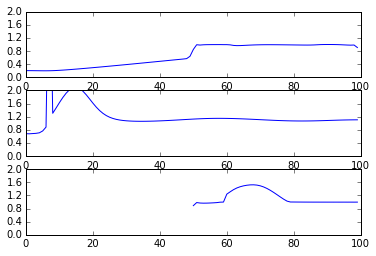

0.571290193819
[19.599950071476677, 120.4852904603211, 120.16492893071229]
cmax*dt/dx = 0.813541 
0.638443580555
0.681267118042
0.88856320462
max H is 0.997603 7.144040 1.523022
60.0268149404
394.628904738


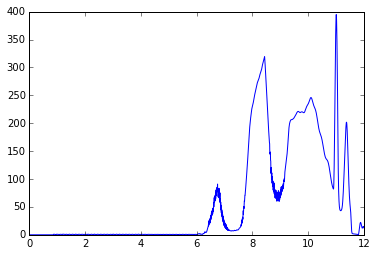

In [16]:
qi = [n1.q(i) for i in range(n1.Nedges)]
hi = [n1.getHofA(i) for i in range(3)]
Ai = [qi[i][0:n1.Ns[i]] for i in range(3)]
Qi = [qi[i][n1.Ns[i]:] for i in range(3)] 
u= []
ymaxs = [ceil(max(h)) for h in hi]
for i in range(3):
        u.append([Qi[i][k]/Ai[i][k] for k in range(n1.Ns[i])])
fig,ax = plt.subplots(nrows = n1.Nedges)
x0 = [0,0,100.-n1.Ns[2]]
for k in range(n1.Nedges):
    x = np.arange(0,n1.Ls[k], n1.Ls[k]/n1.Ns[k])+x0[k]*np.ones(size(hi[k]))
    ax[k].plot(x,hi[k],'b')
    ax[k].set_ylim([0,ymaxs[i]])
    ax[k].set_xlim([0,100])
    ax[k].set_yticks(np.linspace(0,ymaxs[i],6))
plt.show()
print n1.getAveGradH(600)
umax = max(abs(max(ui)) for ui in u)
print n1.cmax
print "cmax*dt/dx = %f "%((max(n1.a)+umax)*dt/n1.Ls[0]*n1.Ns[0])
print hi[0][49]
print hi[1][0]
print hi[2][0]
print "max H is %f %f %f"%(max(hi[0]), max(hi[1]), max(hi[2]))
Hbar = [n1.getAveGradH(i) for i in range(n1.M+1)]
print mean(Hbar)
t = np.linspace(0,n1.T,n1.M+1)
plot(t,Hbar)
print max(Hbar)

In [17]:
ndof = 16
wn = np.array([1,2])
x0 = 0*np.ones(ndof*len(wn))
for i in range(ndof*len(wn)/2):
    x0[2*i+1] = 0
opt1 = PyBC_opt_dh(fi, fc, ndof, x0, 1, wn)
opt1.compute_f()
f0 = opt1.f
print "f is %f" %opt1.f
print "T is %f" %opt1.T
print "Using %s modes" %opt1.modetype

f is 477.333745
T is 12.000000
Using Fourier modes


In [18]:
opt1.solve()
#opt1.x
#opt1.r


Final f/Initial f  = 0.031681418704934


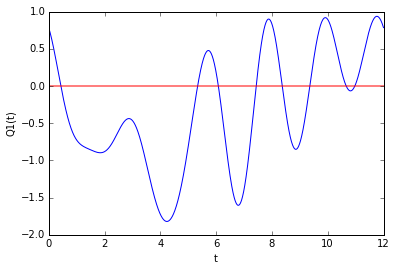

In [19]:
#import matplotlib.pyplot as plt
ff = opt1.f
Q1 = opt1.getBCtimeseries(0)
Q2 = opt1.getBCtimeseries(1)
print "Final f/Initial f  = %.15f"%(ff/f0)
t = np.linspace(0,opt1.T, opt1.M+1)
plot(t,Q1,t,np.zeros(opt1.M+1),'r')
xlabel('t')
ylabel('Q1(t)')



[-0.6746336425052268, 0.3929209271302193, 0.1973050791881181, -0.05013525191675948, 0.23496014533696993, 0.05708314708689007, 0.3522406842364152, -0.09905964763856627, 0.0734732917634615, -0.5896266740705881, -0.0792411751293785, -0.07888391087489807, -0.3046798334842904, 0.520074906919188, -0.2943897531723091, -0.14160338303198525, -8.623427645223251e-06, -3.6521105914176848e-06, -1.2484771645342056e-05, 9.792962812864235e-06, 1.0745510279929457e-05, 1.2520849540545679e-05, -4.544559347600004e-06, -1.155025325385363e-06, 9.041571992302412e-06, -2.1574126074518583e-05, -6.199034669364961e-06, 4.843472497262422e-06, -2.7997384888334016e-06, -1.0799020768271911e-05, -3.523753990486484e-06, 5.9742214963075885e-06]


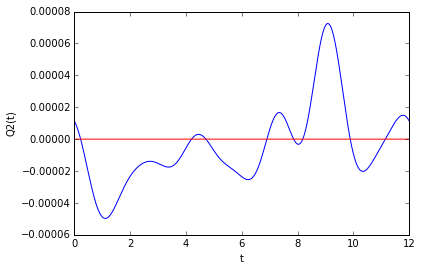

In [20]:
plot(t,Q2,t,np.zeros(opt1.M+1),'r')
xlabel('t')
ylabel('Q2(t)')
n1.Ns
n1.a

print opt1.x

In [21]:
for i in range(len(x0)):
    x0[i] = opt1.x[i]
opt2 = PyBC_opt_dh(fi, fc, ndof, x0, 1, wn)
opt2.compute_f()
print opt2.f

15.122610225


Note that: 3pipes3 was:

[PIPE_INFO]
;-------------------------------------------
;             initial  initial
; ID    N       h       Q
;-------------------------------------------
  0    100	  0.8   2.
  1    100	  0.8   1.
  2    50    0.8   1.



[JUNCTION_INFO]
;-------------------------------------------------------------------------------------
;     		{-----for junction1s-----} | {--for junction2s--} | {------for junction3s-------}|        
; ID   	jtype	bvaltype  bval   reflect   | offset   valveopen   | offset01   offset02   offset12 | 
;------------------------------------------------------------------------------------
  0      1      1         0        1	   0           1      0	     0		0    
  1    	 3	    1         0        0	   0	       1	  0	     0		0  	
  2    	 1	    1         0        0	   0           1	  0	     0		0  
  3    	 1	    1	      0        0	   0           1	  0	     0		0  


[TIME_INFO]
;----------------------------
;T (sec)           M           Mi       
;--------------------------------
  12 	        1800           50   120
; 25	        3500          10   120



3pipes1.inp was

[TITLE]


[JUNCTIONS]
;ID              	Elev        	Demand      	Pattern         
 0               	0         	0           	                	;
 1               	0         	0           	                	;
 2               	0         	0           	                	;
 3               	0         	0           	                	;

[RESERVOIRS]
;ID              	Head        	Pattern         

[TANKS]
;ID              	Elevation   	InitLevel   	MinLevel    	MaxLevel    	Diameter    	MinVol      	VolCurve

[PIPES]
;ID              	Node1           	Node2           	Length      	Diameter    	Roughness   	MinorLoss   	Status
 0               	0               	1               	100         	1           	0.0       	0           	Open  	;
 1               	1               	2               	100         	1.           	0.0       	0           	Open  	;
 2               	1               	3               	50          	1.           	0.0       	0           	Open  	;

[PUMPS]
;ID              	Node1           	Node2           	Parameters

[VALVES]
;ID              	Node1           	Node2           	Diameter    	Type	Setting     	MinorLoss   

[TAGS]

[DEMANDS]
;Junction        	Demand      	Pattern         	Category

[STATUS]
;ID              	Status/Setting

[PATTERNS]
;ID              	Multipliers

[CURVES]
;ID              	X-Value     	Y-Value

[CONTROLS]

[RULES]

[ENERGY]
 Global Efficiency  	75
 Global Price       	0
 Demand Charge      	0

[EMITTERS]
;Junction        	Coefficient

[QUALITY]
;Node            	InitQual

[SOURCES]
;Node            	Type        	Quality     	Pattern

[REACTIONS]
;Type     	Pipe/Tank       	Coefficient


[REACTIONS]
 Order Bulk            	1
 Order Tank            	1
 Order Wall            	1
 Global Bulk           	0
 Global Wall           	0
 Limiting Potential    	0
 Roughness Correlation 	0

[MIXING]
;Tank            	Model

[TIMES]
 Duration           	0
 Hydraulic Timestep 	1:00
 Quality Timestep   	0:05
 Pattern Timestep   	1:00
 Pattern Start      	0:00
 Report Timestep    	1:00
 Report Start       	0:00
 Start ClockTime    	12 am
 Statistic          	None

[REPORT]
 Status             	No
 Summary            	No
 Page               	0

[OPTIONS]
 Units              	LPM
 Headloss           	H-W
 Specific Gravity   	1
 Viscosity          	1
 Trials             	40
 Accuracy           	0.001
 CHECKFREQ          	2
 MAXCHECK           	10
 DAMPLIMIT          	0
 Unbalanced         	Continue 10
 Pattern            	1
 Demand Multiplier  	1.0
 Emitter Exponent   	0.5
 Quality            	None mg/L
 Diffusivity        	1
 Tolerance          	0.01

[COORDINATES]
;Node            	X-Coord         	Y-Coord
 0               	0       		0         
 1               	5	         	0         
 2               	8.5	        	4        
 3               	7	                -3          

[LABELS]
;X-Coord           Y-Coord          Label & Anchor Node

[BACKDROP]
 DIMENSIONS     	0.00            	0.00            	10000.00        	10000.00        
 UNITS          	None
 FILE           	
 OFFSET         	0.00            	0.00            

[END]